# Simple Linear REGRESSION
<b>Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.
Simple Linear Regression is where only one independent variable is present and the model has to find the linear relationship of it with the dependent variable</b>
    
Here we will try to predict percentage of thew student based on the study Hours using simple linear regression




### Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

<b>Importing the Dataset</b>
<br>The Dataset has one independent variable (No. of Study Hours) based on which we will predict the target variable (percentage of Student)

In [3]:
dataset = pd.read_csv('H:/Datasets/student_scores.csv')
dataset.shape

(25, 2)

#### Dataset has 25 records  with study hours ranging from 1-9 (hrs) while scores obtained by students ranges from 17 to 95(percent)

In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Initial records in the Dataset

In [5]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
dataset.shape

(25, 2)

## Splitting the feature column and target column

In [10]:
X = dataset['Hours'] #independent variable - study Hours
Y = dataset['Scores'] #dependent variable - obtained scores


In [11]:
x = np.array(X)
y = np.array(Y)

# Visualizing the Dataset
The below plot displays relationship between  both the variables using Cartesian Coordinates. No. of Study Hours is varying linearly with the percentage obtained hence we will use simple linear regression to build a model

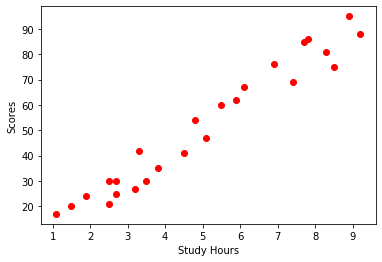

In [12]:
plt.scatter(X , Y , color='red')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

# Building the model from scratch using training data

Equation of Simple Linear Regression, where bo is the intercept, b1 is coefficient or slope, x is the independent variable and y is the dependent variable.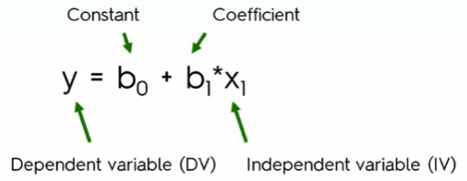

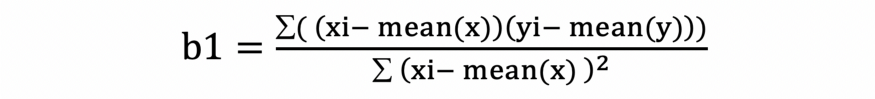
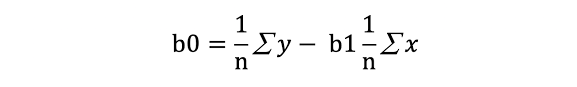

<b>A Linear Regression model’s main aim is to find the best fit linear line and the optimal values of intercept and coefficients such that the error is minimized.</b>





In [21]:
x_mean = np.mean(X)
y_mean = np.mean(Y)
n = len(X)
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
print(b1, b0)

9.775803390787475 2.4836734053731746


## Visualizing the trained model on the training data

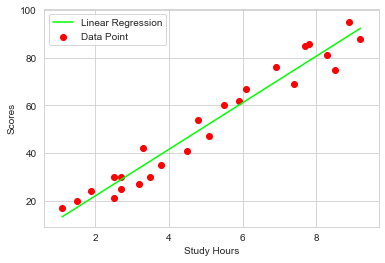

In [19]:
x_max = np.max(X)
x_min = np.min(X)
#calculating line values of x and y
x1 = np.linspace(x_min, x_max)
y1 = b0 + b1 * x1
#plotting line 
plt.plot(x1, y1, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('Study Hours')
#y-axis label
plt.ylabel('Scores')
plt.legend()
plt.show()

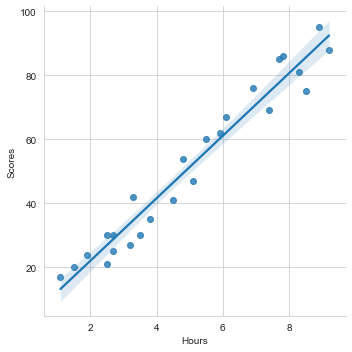

In [20]:
sns.set_style('whitegrid')
sns.lmplot(x ='Hours', y ='Scores', data = dataset)

## Implementing the same using inbuilt functions to analyze
(The best fit line chosen in both the cases varies have  very slight difference)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x.reshape(-1 , 1) , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
regressor.coef_  #b1

array([9.77580339])

In [12]:
regressor.intercept_

2.483673405373196

## Evaluating the model
The most common metric for evaluating linear regression model performance is called root mean squared error, or RMSE.


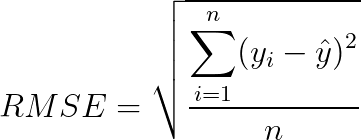

In [22]:
rmse = 0
predictions = []
for i in range(n):
    y_pred =  b0 + b1* X[i]
    predictions.append(y_pred)
    rmse += (Y[i] - y_pred) ** 2
rmse = (1/n)*(np.sqrt(rmse))
print(rmse) 
    




1.0748531157185242


In [43]:
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y, predictions))

Mean Absolute Error: 4.972805319866378


In [14]:
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.9529481969048356


# what will be the score if student studies for 9.25 hrs/day?

In [35]:
result = b0 + b1*9.25
print(result)

92.90985477015732


In [38]:
regressor.predict([[9.25]])

array([92.90985477])